In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/colab_files/dataset_for_assignment.csv')
df.head()

comment_text  target
0  Explanation\nWhy the edits made under my usern...       0
1  D'aww! He matches this background colour I'm s...       0
2  Hey man, I'm really not trying to edit war. It...       0
3  "\nMore\nI can't make any real suggestions on ...       0
4  You, sir, are my hero. Any chance you remember...       0

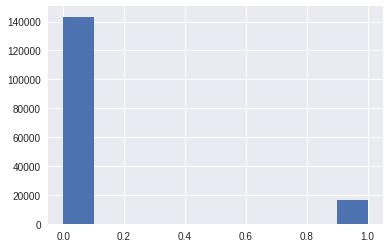

In [0]:
df.target.hist()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.comment_text)
Y = df.target

In [0]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve

def report(true, predict, threshold=0.5):
  print('Accuray\t\t {:.3f}'.format(accuracy_score(true, predict > threshold)))
  print('accuracy_score\t {:.3f}'.format(roc_auc_score(true, predict)))
  print('classification_report:\n' + classification_report(true, predict > threshold))
  
def pr_curve(true, predict, threshold=0.5):
  precision, recall, thresholds = precision_recall_curve(true, predict)
  
  plt.figure(figsize=(10,10))
  plt.plot(thresholds, precision[1:], label='precision')
  plt.plot(thresholds, recall[1:], label='recall')
  plt.legend()
  plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Accuray		 0.953
accuracy_score	 0.971
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28610
           1       0.93      0.59      0.72      3305

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.94      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915



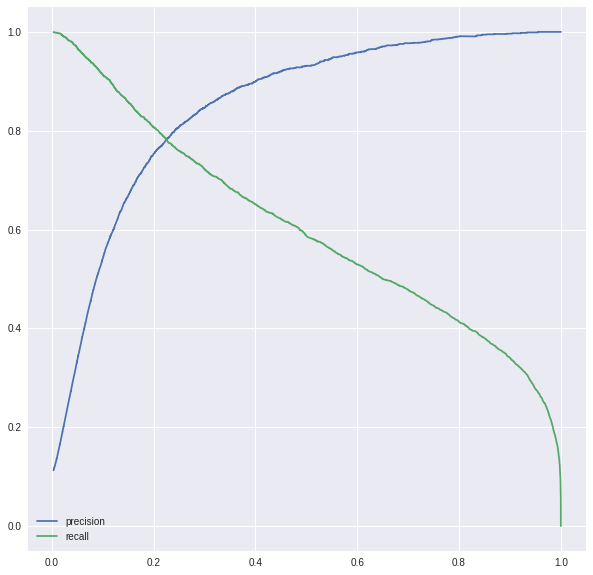

In [0]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
prediction = clf.predict_proba(X_test)[:,1]
report(y_test, prediction)
pr_curve(y_test, prediction)

In [0]:
report(y_test, prediction)

Accuray		 0.953
accuracy_score	 0.971
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28610
           1       0.93      0.59      0.72      3305

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.94      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915



In [0]:
report(y_test, prediction, threshold=0.2)

Accuray		 0.953
accuracy_score	 0.971
classification_report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     28610
           1       0.75      0.81      0.78      3305

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.87      0.89      0.88     31915
weighted avg       0.95      0.95      0.95     31915



In [0]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict_proba(X_test)[:,1]
report(y_test, prediction)

Accuray		 0.957
accuracy_score	 0.963
classification_report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28610
           1       0.93      0.63      0.75      3305

   micro avg       0.96      0.96      0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



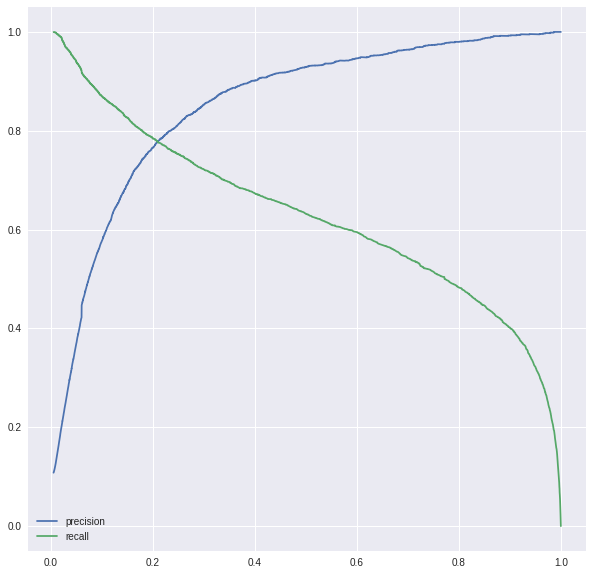

In [0]:
pr_curve(y_test, prediction)

In [0]:
report(y_test, prediction, threshold=0.62)

Accuray		 0.954
accuracy_score	 0.963
classification_report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28610
           1       0.95      0.58      0.72      3305

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.95      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915



In [0]:
choosen_features = clf.feature_importances_ > 0
sum(choosen_features)

514

In [0]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train[:,choosen_features], y_train)
prediction = clf.predict_proba(X_test[:,choosen_features])[:,1]
report(y_test, prediction)

Accuray		 0.957
accuracy_score	 0.963
classification_report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28610
           1       0.93      0.63      0.75      3305

   micro avg       0.96      0.96      0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



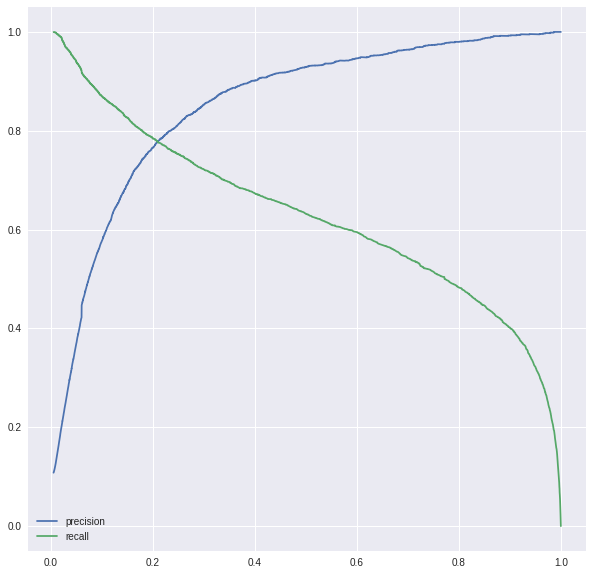

In [0]:
pr_curve(y_test, prediction)

In [0]:
report(y_test, prediction, threshold=0.21)

Accuray		 0.954
accuracy_score	 0.963
classification_report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28610
           1       0.78      0.78      0.78      3305

   micro avg       0.95      0.95      0.95     31915
   macro avg       0.88      0.88      0.88     31915
weighted avg       0.95      0.95      0.95     31915



In [0]:
from sklearn.externals import joblib
# now you can save it to a file
joblib.dump(clf, '/content/gdrive/My Drive/colab_files/classifier.pkl') 
joblib.dump(vectorizer, '/content/gdrive/My Drive/colab_files/vectorizer.pkl') 

['/content/gdrive/My Drive/colab_files/vectorizer.pkl']

## Fastai


In [0]:
from fastai.text import * 

In [0]:
path = '/content/gdrive/My Drive/colab_files/'

data_lm = TextLMDataBunch.from_csv(path, 'dataset_for_assignment.csv')
data_clas = TextClasDataBunch.from_csv(path, 'dataset_for_assignment.csv', vocab=data_lm.train_ds.vocab, bs=64)

In [0]:
moms = (0.8,0.7)

learn = language_model_learner(data_lm, AWD_LSTM)
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-2), moms=moms)

Толку от такой моделки.